---
title: "Regressão Linear"
author: "Gustavo J. V. Meira Filho"
format:
    # html:
    #     code-fold: true
    #     code-summary: "Show Code"
    #     toc: true
    #     toc-depth: 3
    pdf:
        documentclass: scrreprt
        pdf-engine: xelatex
        toc: true
        toc-depth: 3
        include-in-header: 
            text: |
                \usepackage[a4paper,margin=2.5cm]{geometry}
        execute:
            echo: true     
            warning: false   
            message: false 
execute:
    fig-format: png       
jupyter: AIChE-Internal-Challenges
---

\newpage
# Bibliotecas e Importações

In [49]:
# Nativas Python
import sys
import os

# Dados Tabulares
import pandas as pd
import numpy as np

# Visualização
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
from graphmodex import plotlymodex

import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Imagem png ou interativa (notebook)
pio.renderers.default = 'png'

\newpage
# **Objetivo**

> Introduzir à ciência de dados e processos de otimização por álgebra linear.

* <span style="color: #3d9be7ff"><strong>Conceitos de programação:</strong></span> 
  * Arrays
  * Ajustes de Curva
  * Otimização
  * Redes neurais
* <span style="color: #3d9be7ff"><strong>Bibliotecas:</strong></span>  
  * `numpy`
  * `plotly`
* <span style="color: #3d9be7ff"><strong>Aplicações:</strong></span> 

  * Ajustar uma reta em dados experimentais (ex.: Conversão do Reator vs Temperatura).
  * Mostrar coeficientes da regressão (slope/intercept) e interpretar fisicamente.
  * Métricas de Goodness-of-Fit
  * Introdução à como funcionam redes neurais

\newpage 

# **Introdução**

* O que é modelagem → ajustar uma função matemática a dados experimentais.
* Por que é útil → prever comportamento de processos químicos (ex.: reatores, trocadores, cinética).
* Regressão linear é o caso mais simples de aprendizado de máquina.

Exemplo físico para motivar:
> “Queremos ver como a conversão do reator (X) varia com a temperatura (T) e encontrar a equação linear que melhor representa esse comportamento experimental.”

```
T (x) → variável independente  
X (y) → variável dependente  
y = a·x + b
```

In [51]:
# Dados sintéticos de temperatura (K) e conversão (%)
T = np.array([300, 320, 340, 360, 380, 400])
X_exp = np.array([0.10, 0.20, 0.32, 0.40, 0.48, 0.59])  # dados experimentais

In [52]:
iris = sns.load_dataset('iris')
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


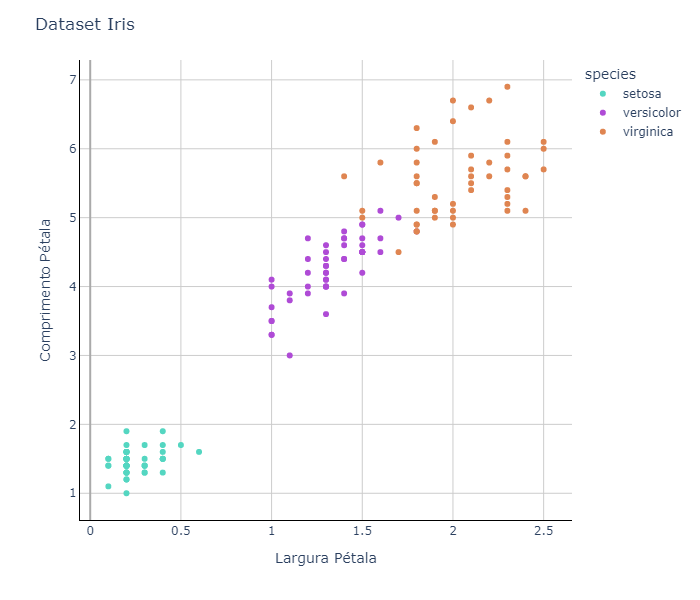

In [53]:
fig = px.scatter(
    iris, x='petal_width', y='petal_length', color='species', 
    color_discrete_sequence=["#54D6C1","#AF4BD6","#DF8551"]
)

plotlymodex.main_layout(
    fig, title='Dataset Iris', 
    x='Largura Pétala', y='Comprimento Pétala'
)

In [54]:
X = np.array(iris.petal_width.copy(deep=True))
y = np.array(iris.petal_length.copy(deep=True))

# **Regressão Linear Matricial**

O modelo de regressão linear assume uma das formas mais simples de modelagem, pois conta com os mesmo parâmetros da função linear – ou seja, um coeficiente linear 0 e outros coeficientes angulares n – sendo que é possível alocar múltiplas variáveis de input xn.
Sendo ŷ o valor predito, podemos escrever o modelo da seguinte forma:

$$\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + \dots + \theta_nx_n$$

$$\hat{y} = \theta_0 + \sum^n_{i\,=\,1} \theta_ix_i$$

Da mesma forma, podemos escrever essa relação em termos matriciais (forma vetorizada) para ser recebido pelo modelo.

$$\hat{y} = h_\theta (\mathbf{x}) = \theta \cdot \mathbf{x}$$

Nesse caso,  representa o vetor de parâmetros do modelo, incluindo o termo de bias 0 e os de features n. O termo x é um vetor que contém os valores de x0 =1 até xn. Portanto, a operação considera o produto matricial entre:

$$\hat{y} = \boldsymbol{\theta}^T \mathbf{x} =
\begin{bmatrix}
\theta_0 & \theta_1 & \theta_2 & \dots & \theta_n
\end{bmatrix}
\cdot
\begin{bmatrix}
1 \\
x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix}$$

É importante identificar a notação matemática, com o sobrescrito T sendo um indicador de matriz transposta. Isso é necessário pois em ML os vetores são todos representados por vetores coluna.
Na regressão linear, precisamos achar o valor de  que minimiza o RMSE. Na prática, é mais simples minimizar o MSE, sendo que ele leva para o mesmo resultado já que minimizá-lo também é minimizar sua raiz quadrada.
Se considerarmos h como sendo a função de predição do sistema – também chamado de hipótese, indicamos que a hipótese de regressão linear considerando uma parametrização por  (h) em um conjunto de dados de treino X, temos a seguinte equação:

$$\text{MSE}(\mathbf{X}, h_\theta) = \frac{1}{m} \sum_{i=1}^{m} \left( \theta^T \mathbf{x}^{(i)} - y^{(i)} \right)^2$$

Para o caso da regressão linear, o vetor de parâmetros  que minimiza MSE() possui uma solução fechada e analítica que é chamada de equação normal.
Podemos transformar essa função de minimização em uma forma matricial:

$$\text{MSE}({\theta}) = \frac{1}{m} (\mathbf{X}{\theta} - \mathbf{y})^\top (\mathbf{X}{\theta} - \mathbf{y})$$

Quando expandimos essa equação, temos que

$$\text{MSE}(\theta) = \frac{1}{m} \left[ \theta^\top \mathbf{X}^\top \mathbf{X} \theta - 2 \mathbf{y}^\top \mathbf{X}\theta + \mathbf{y}^\top \mathbf{y} \right]$$

Uma vez que MSE é diferenciável, a condição mínima é alcançada quando a derivada é igual à zero. Se  MSE() for a derivada, então queremos que

$$\nabla_{\theta} \, \text{MSE}(\theta) = 0$$

Ao calcular essa derivada obtemos

$$\nabla_{\theta} \, \text{MSE}(\theta) = \frac{2}{m} \mathbf{X}^\top \mathbf{X} \theta - \frac{2}{m} \mathbf{X}^\top \mathbf{y}$$

Igualando a zero encontramos

$$\mathbf{X}^\top \mathbf{X} \theta = \mathbf{X}^\top \mathbf{y}$$

Se XTX for inversível (significa dizer que X -1X=XX -1=I) e, com isso, que det(XTX)0 e que todas as colunas são linearmente independentes, então a solução fechada é dada por:

$$\hat{{\theta}} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}$$

Aqui,  é o valor que minimiza  e y é o vetor contendo os valores de y(1) até y(m). Só para ter plena ciência da notação, o vetor x(1) é uma coluna contendo os inputs e o vetor y(1) contém os output. Um exemplo seria dizer que 

$$\mathbf{x}^{(1)} = \begin{pmatrix} 1 \\
2 \\
3 \\
4 \\
\end{pmatrix}$$

Fornece os valores que preveem 

$$y^{(1)} = 5$$

Supondo um cenário de 2000 inputs, podemos escrever:

$$\mathbf{X} = \begin{pmatrix} (\mathbf{x}^{(1)})^\top \\
(\mathbf{x}^{(2)})^\top \\
\vdots \\{x}^{(1999)})^\top \\
(\mathbf{x}^{(2000)})^\top \\
\end{pmatrix} = \begin{pmatrix} 1 & 2 & 3 & 4 \\
\vdots & \vdots & \vdots & \vdots 
\end{pmatrix}$$

De forma que y (1) =h(x(1)) é a previsão do valor. 
É importante entender que há uma forte necessidade de haver inversibilidade em XTX. Mas ainda assim é possível realizar regressões lineares em matrizes não inversíveis a partir do conceito de matriz pseudoinversa. A pseudoinversa de Moore-Penrose (X+) é uma generalização da inversão de matrizes. Quando X  for quadrada e inversível, então X+ =X-1. Contudo, em casos em que esses critérios não forem adequados, então podemos usar a decomposição de valores singulares (SVD) de forma que 

$$\mathbf{X} = \mathbf{U\Sigma V}^\top$$

$$\mathbf{X}^+ = \mathbf{V\Sigma^+U }^\top$$

Em que U e V são matrizes ortogonais (rotação / espelhamento) e  é uma matriz com valores singulares maiores ou iguais a zero. Nesse caso, assim como no próprio numpy, temos que a regressão linear é fornecida por:

$$\hat{\theta} = \mathbf{X^+ y}$$

Como a equação normal computa o inverso de XTX – que é uma matriz de (n+1)(n+1) com n sendo o número de features – a complexidade computacional da inversão dessa matriz reside entre O(n2,4) à O(n3) a depender da implementação. Usando o scikit-learn, a complexidade computacional a partir do SVD é de O(n2), de forma que se dobrarmos a quantidade de features o tempo computacional irá quadruplicar.


In [55]:
novo_X = []
for value in X:
    novo_X.append([float(value), 1.])

novo_X = np.array(novo_X)

print('shape =', novo_X.shape)
novo_X[:5]

shape = (150, 2)


array([[0.2, 1. ],
       [0.2, 1. ],
       [0.2, 1. ],
       [0.2, 1. ],
       [0.2, 1. ]])

In [56]:
# Outra forma de escrevermos isso é por:
X = np.vstack([X, np.ones(len(X))]).T
X[:5]

array([[0.2, 1. ],
       [0.2, 1. ],
       [0.2, 1. ],
       [0.2, 1. ],
       [0.2, 1. ]])

In [57]:
print('shape =', y.shape)
y[:5]

shape = (150,)


array([1.4, 1.4, 1.3, 1.5, 1.4])

In [58]:
theta = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'theta =', theta)

theta = [2.2299405  1.08355803]


In [59]:
alpha, beta = theta

print(f"""Parâmetros Calculados:
a = {alpha:.2f}
b = {beta:.2f}
""")

Parâmetros Calculados:
a = 2.23
b = 1.08



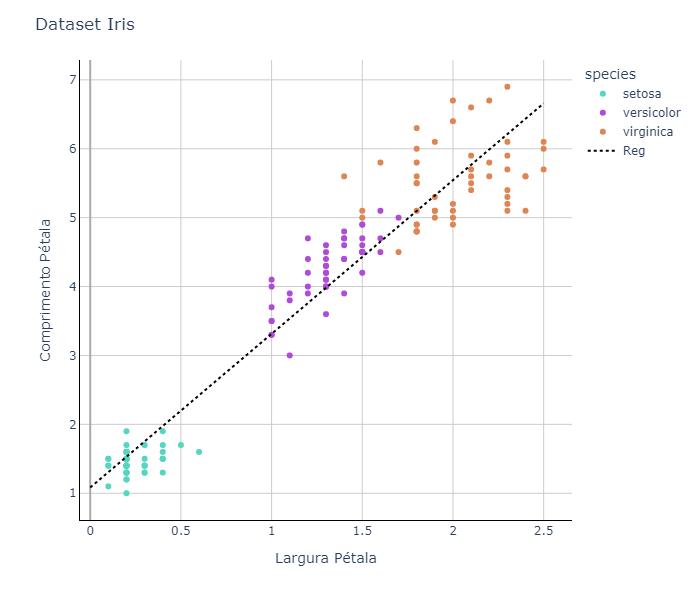

In [60]:
x_regressao = np.array([0, 2.5])
y_regressao = alpha*x_regressao + beta

fig.add_trace(go.Scatter(
    x=x_regressao, y=y_regressao,
    mode='lines', line=dict(color='black', dash='dot'),
    name='Reg'
))

\newpage

## Função de Regressão

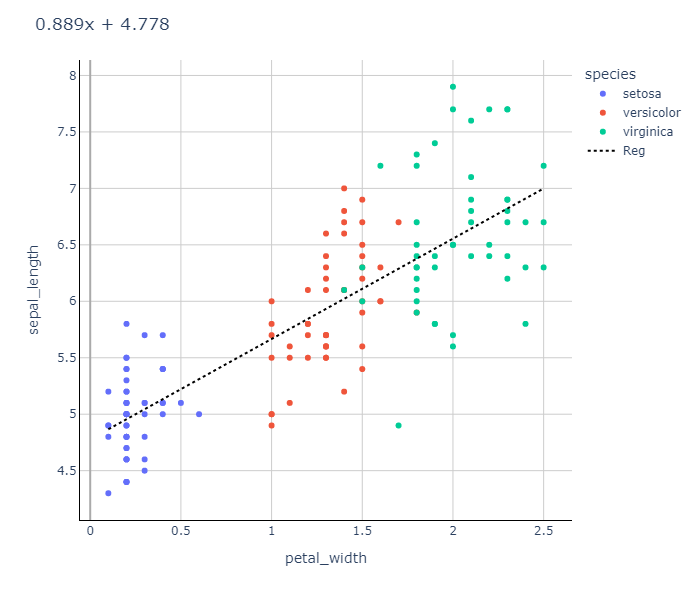

In [77]:
def regressao_linear(
        df, 
        x=None, 
        y=None,
        color=None,
        plot=True,
    ):
    X = np.array(df[x])
    X = np.vstack([X, np.ones(len(X))]).T

    y_ = np.array(df[y])

    theta = np.linalg.inv(X.T @ X) @ X.T @ y_
    alpha, beta = theta

    if plot:
        fig = px.scatter(
            df, x=x, y=y, color=color, 
        )

        x_regressao = np.linspace(df[x].min(), df[x].max(), 200)
        y_regressao = alpha*x_regressao + beta

        fig.add_trace(go.Scatter(
            x=x_regressao, y=y_regressao,
            mode='lines', line=dict(color='black', dash='dot'),
            name='Reg'
        ))  

        plotlymodex.main_layout(
            fig, x=x, y=y, title=f"{alpha:.3f}x + {beta:.3f}"
        )

        fig.show()

    return alpha, beta

regressao_linear(df=iris, x='petal_width', y='sepal_length', color='species');

\newpage

## Regressão Polinomial

Podemos adicionar parâmetros com diferentes níveis de exponenciação para caracterizar curvas polinomiais e que, consequentemente, não se adequam ao padrão linear



Aqui, a única diferença da linear é, portanto, a presença de valores exponenciais de X:

$$x \;\;\to\;\; [1, x, x^2, x^3, \dots, x^d]$$

Dessa forma, o modelo polinomial pode ser definido por:

$$y \approx \theta_0 + \theta_1 x + \theta_2 x^2 + \dots + \theta_d x^d$$

As formas de descoberta dos valores dos parâmetros são as mesmas da Regressão Linear, ou seja, equação normal, decomposição SVD e SGD. Em caso de polinômios de alto grau, é comum a presença de overfitting, de forma que podemos usar mecanismos de regularização (Ridge e Lasso) para evitar esse problema.


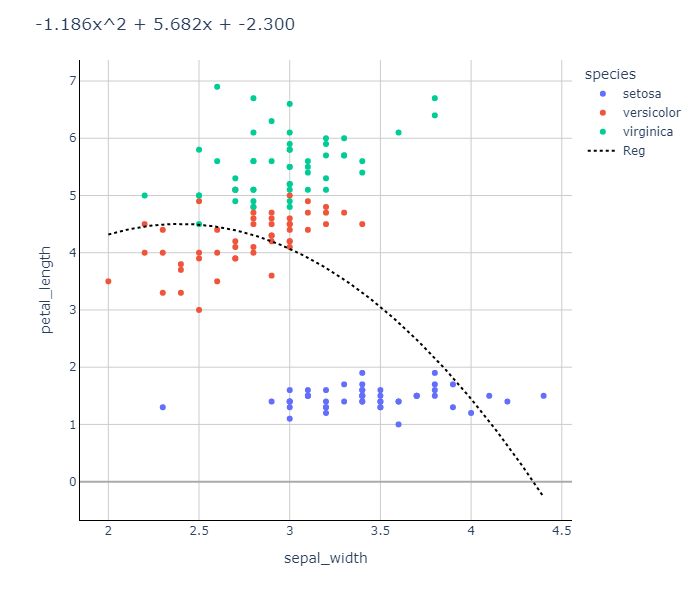

In [62]:
def regressao_quadratica(
        df, 
        x=None, 
        y=None,
        color=None,
        plot=True,
        return_y_pred=False, 
    ):
    X = np.array(df[x])
    X = np.vstack([X**2, X, np.ones(len(X))]).T

    y_ = np.array(df[y])

    theta = np.linalg.inv(X.T @ X) @ X.T @ y_
    alpha, beta, gamma = theta

    if plot:
        fig = px.scatter(
            df, x=x, y=y, color=color
        )

        x_regressao = np.linspace(df[x].min(), df[x].max(), 200)
        y_regressao = alpha*x_regressao**2 + beta*x_regressao + gamma

        fig.add_trace(go.Scatter(
            x=x_regressao, y=y_regressao,
            mode='lines', line=dict(color='black', dash='dot'),
            name='Reg'
        ))  

        plotlymodex.main_layout(
            fig, x=x, y=y, title=f"{alpha:.3f}x^2 + {beta:.3f}x + {gamma:.3f}"
        )

        fig.show()

    if return_y_pred:
        return alpha*np.array(df[x])**2 + beta*np.array(df[x]) + gamma

    return alpha, beta, gamma

regressao_quadratica(
    df=iris, x='sepal_width', 
    y='petal_length', color='species'
);

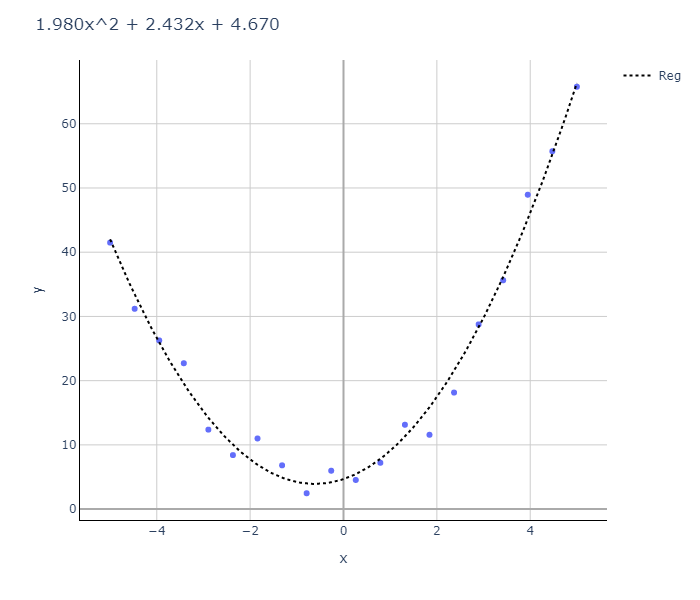

In [90]:
# Gera dados simulando uma relação quadrática: y = 2x² + 3x + 5 + ruído
np.random.seed(42)
x = np.linspace(-5, 5, 20)
y = 2*x**2 + 3*x + 5 + np.random.normal(0, 3, size=len(x))

# Cria DataFrame
df_teste = pd.DataFrame({'x': x, 'y': y})
regressao_quadratica(df=df_teste, x='x', y='y');

## Regressão Múltipla

Nosso intúito aqui é alocar uma terceira dimenção, de forma que teremos $x_1$ e $x_2$.

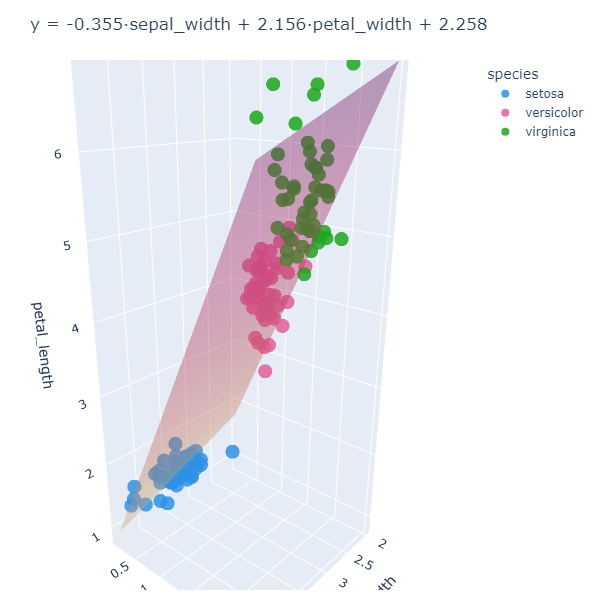

In [64]:
def regressao_multipla(
        df, 
        x1=None, 
        x2=None,
        y=None,
        plot=True,
    ):
    X1 = np.array(df[x1])
    X2 = np.array(df[x2])
    X = np.vstack([X1, X2, np.ones(len(X1))]).T

    y_ = np.array(df[y])

    theta = np.linalg.inv(X.T @ X) @ X.T @ y_
    beta1, beta2, gamma = theta

    if plot:
        # Base 3D scatter
        fig = px.scatter_3d(
            df, x=x1, y=x2, z=y, color='species',
            opacity=0.85, size_max=6,
            color_discrete_sequence=px.colors.qualitative.Dark24
        )
        
        # Create regression surface grid
        x1_range = np.linspace(df[x1].min(), df[x1].max(), 30)
        x2_range = np.linspace(df[x2].min(), df[x2].max(), 30)
        x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
        y_grid = beta1*x1_grid + beta2*x2_grid + gamma

        # Add regression plane
        fig.add_trace(go.Surface(
            x=x1_grid, y=x2_grid, z=y_grid,
            colorscale='sunsetdark', opacity=0.4,
            showscale=False, 
        ))

        plotlymodex.main_layout(fig)

        # Layout styling
        fig.update_layout(
            title=f"y = {beta1:.3f}·{x1} + {beta2:.3f}·{x2} + {gamma:.3f}",
            margin=dict(l=10, r=10, b=10, t=60),
            scene_camera=dict(
                eye=dict(x=1.6, y=1.4, z=0.8)
            ),
            width=600
        )

        fig.show()

    return beta1, beta2, gamma

regressao_multipla(
    df=iris, x1='sepal_width', x2='petal_width', 
    y='petal_length',
);

# **Métricas de Goodness-of-Fit**

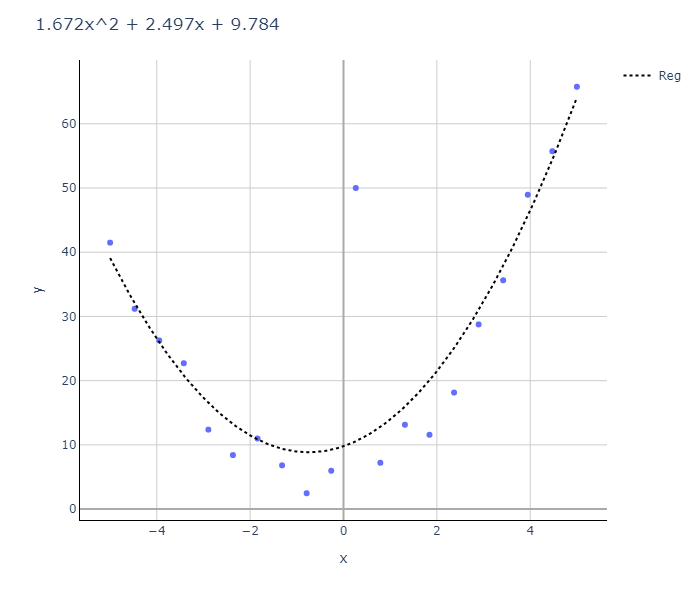

array([39.08671752, 32.06633748, 25.97204804, 20.80384918, 16.56174091,
       13.24572322, 10.85579613,  9.39195962,  8.85421371,  9.24255838,
       10.55699363, 12.79751948, 15.96413591, 20.05684294, 25.07564055,
       31.02052875, 37.89150753, 45.68857691, 54.41173687, 64.06098742])

In [65]:
# Gera dados simulando uma relação quadrática: y = 2x² + 3x + 5 + ruído
np.random.seed(42)
x = np.linspace(-5, 5, 20)
y = 2*x**2 + 3*x + 5 + np.random.normal(0, 3, size=len(x))
y[10] = 50 

# Cria DataFrame
df_teste = pd.DataFrame({'x': x, 'y': y})
regressao_quadratica(df=df_teste, x='x', y='y', return_y_pred=True)

In [66]:
def mae(y_pred, y_true):
    """
    Calcula o erro absoluto médio (Mean Absolute Error).

    Mede a média das diferenças absolutas entre os valores previstos e os reais.
    É uma métrica simples que indica o quanto, em média, as previsões se afastam
    dos valores observados.
    """
    return np.mean(np.abs(y_pred - y_true)).round(3)


def mse(y_pred, y_true):
    """
    Calcula o erro quadrático médio (Mean Squared Error).

    Mede a média dos quadrados das diferenças entre os valores previstos e os reais.
    Penaliza mais fortemente grandes erros e é muito usada em problemas de regressão.
    """
    return np.mean((y_pred - y_true) ** 2).round(3)


def rmse(y_pred, y_true):
    """
    Calcula a raiz do erro quadrático médio (Root Mean Squared Error).

    É a raiz quadrada do MSE e possui a mesma unidade dos valores previstos.
    Fornece uma noção mais intuitiva da magnitude média do erro.
    """
    return np.sqrt(mse(y_pred, y_true)).round(3)

In [67]:
# Dados inventados com ruído 
np.random.seed(42)
x = np.linspace(-5, 5, 20)
y_true = 2*x**2 + 3*x + 5 + np.random.normal(0, 3, size=len(x))

df_teste = pd.DataFrame({'x': x, 'y': y_true})

y_pred = regressao_quadratica(
    df=df_teste, x='x', y='y', 
    plot=False, return_y_pred=True
)

In [68]:
print('MAE')
mae(
    y_pred=y_pred,
    y_true=y_true
)

MAE


np.float64(1.801)

In [69]:
print('MSE')
mse(
    y_pred=y_pred,
    y_true=y_true
)

MSE


np.float64(4.887)

In [70]:
print('RMSE')
rmse(
    y_pred=y_pred,
    y_true=y_true
)

RMSE


np.float64(2.211)

\newpage 

# **Stochastic Gradient Descent**

**1. Objetivo da Regressão Linear**

A **regressão linear** busca encontrar uma **reta (ou hiperplano)** que melhor se ajusta aos dados.

A forma geral do modelo é:

$$
\hat{y} = X \theta
$$

onde:

* $X$ é a matriz de entrada (com a primeira coluna igual a 1, para o termo de bias),
* $\theta$ é o vetor de parâmetros ($\theta_0, \theta_1, \dots, \theta_n$),
* $\hat{y}$ é a previsão do modelo.

O objetivo é encontrar os parâmetros $\theta$ que **minimizam o erro** entre as previsões $\hat{y}$ e os valores reais $y$.

---

**2. Função de Custo**

A função de custo mais comum é o **Erro Quadrático Médio (MSE)**:

$$
\text{MSE}(\theta) = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{m} (X\theta - y)^T (X\theta - y)
$$

onde $m$ é o número de exemplos de treino.

Nosso objetivo é minimizar $\text{MSE}(\theta)$.

---

**3. Gradiente da Função de Custo**

O **gradiente** (vetor de derivadas parciais) indica a direção de maior crescimento de $\text{MSE}(\theta)$.
Para minimizar a função, precisamos mover $\theta$ na **direção oposta ao gradiente**:

$$
\nabla_\theta \text{MSE}(\theta) = \frac{2}{m} X^T (X\theta - y)
$$

---

**4. Atualização dos Parâmetros — Gradiente Descendente**

O **Gradiente Descendente (GD)** faz atualizações iterativas em $\theta$:

$$
\theta := \theta - \eta \cdot \nabla_\theta \text{MSE}(\theta)
$$

onde:

* $\eta$ é a **taxa de aprendizado (learning rate)** — controla o tamanho do passo dado em cada atualização.

---

**5. SGD — Stochastic Gradient Descent**

O **SGD** é uma variação do gradiente descendente onde o gradiente é calculado **a partir de apenas um exemplo (ou um pequeno batch)** de cada vez.

Enquanto o **Batch Gradient Descent** calcula o gradiente usando **todos os exemplos**, o **SGD** usa **apenas um exemplo aleatório** em cada iteração:

$$
\theta := \theta - \eta \cdot 2x_i^T (x_i \theta - y_i)
$$

onde $(x_i, y_i)$ é um único exemplo do conjunto de dados.


**Passo a passo:**

1. **Inicializa os parâmetros** aleatoriamente (`theta`).

2. **Para cada época (epoch):**

   * Escolhe **um exemplo aleatório** `(xi, yi)`.
   * Calcula o **gradiente local**:
     $$
     g_i = 2x_i^T(x_i \theta - y_i)
     $$
   * Atualiza $\theta$ na direção contrária ao gradiente:
     $$
     \theta := \theta - \eta g_i
     $$

3. Após várias épocas, $\theta$ converge para valores que minimizam o erro médio.

---

**6. Intuição Geométrica**

* O vetor $\theta$ define a **reta** (ou hiperplano) que ajusta os dados.
* O gradiente indica **para onde o erro cresce mais**.
* Atualizar $\theta$ na direção oposta **reduz o erro**.
* No SGD, como cada passo é feito com apenas um exemplo, o caminho até o mínimo **é oscilante**, mas converge em média para a solução ótima.

Vamos começar selecionando os mesmos dados do dataset iris que estavmos usando! Aqui, vamos fazer nosso algoritmo já considerando as dimensões certas.

In [71]:
X = np.array(iris.petal_width.copy(deep=True))
y = np.array(iris.petal_length.copy(deep=True))

# Cria matriz de entrada com a forma [[x, 1.], [x, 1.], ...]
X_b = np.c_[X, np.ones(len(X))]  # shape (6, 2)
print(f'{" X_b ":=^11}')
print(X_b[:5])
print()
print(f'{" y ":=^11}')
print(y.reshape(-1, 1)[:5])

=== X_b ===
[[0.2 1. ]
 [0.2 1. ]
 [0.2 1. ]
 [0.2 1. ]
 [0.2 1. ]]

==== y ====
[[1.4]
 [1.4]
 [1.3]
 [1.5]
 [1.4]]


O parâmetro $\eta$ é de extrema importância para nosso GoF (goodness-of-fit). Ele indicará se o mínimo local estará muito longe para ser alcançado no nosso número de épocas, se será ideal ou se a gente baterá loucamente em todos os lados da funçaõ convexa.

In [72]:
# Hiperparâmetros
eta = 0.001  # learning rate
n_epochs = 100
m = len(X)

# Inicialização aleatória de theta (2x1)
theta = np.random.randn(2, 1)

# SGD
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]  # shape (1, 2)
        yi = y[random_index:random_index+1].reshape(-1, 1)

        # Gradiente (forma vetorizada)
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)

        # Atualização dos parâmetros
        theta = theta - eta * gradients

print("Parâmetros ajustados (theta):")
print(theta)

# Previsões
y_pred = X_b.dot(theta)

print("\nPrevisões:")
print(y_pred.ravel()[:5])

Parâmetros ajustados (theta):
[[2.19233248]
 [1.066523  ]]

Previsões:
[1.50498949 1.50498949 1.50498949 1.50498949 1.50498949]


Conseguimos visualizar todo o racional que ele está fazendo por debaixo dos panos!

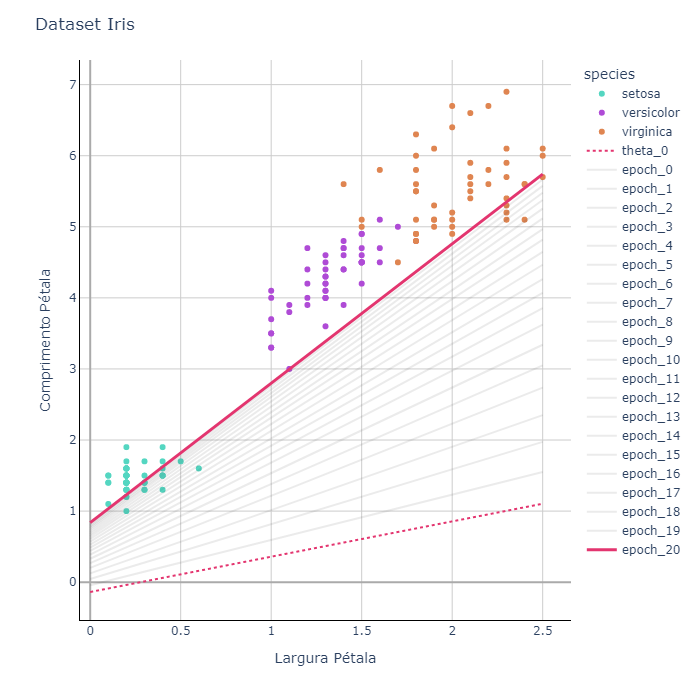

In [73]:
fig = px.scatter(
    iris, x='petal_width', y='petal_length', color='species', 
    color_discrete_sequence=["#54D6C1","#AF4BD6","#DF8551"]
)

plotlymodex.main_layout(
    fig, title='Dataset Iris', height=700,
    x='Largura Pétala', y='Comprimento Pétala'
);

# Hiperparâmetros
eta = 0.0001  # learning rate
n_epochs = 21
m = len(X)

# Inicialização aleatória de theta (2x1)
np.random.seed(42)
theta = np.random.randn(2, 1)
a, b = theta
a, b = a.item(), b.item()

x1=0; x2=2.5
fig.add_trace(go.Scatter(
    x=np.array([x1, x2]), y=np.array([a*x1+b, a*x2+b]),
    mode='lines', line=dict(color='#e3356f', dash='dot'),
    name='theta_0'
))

# SGD
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]  # shape (1, 2)
        yi = y[random_index:random_index+1].reshape(-1, 1)

        # Gradiente (forma vetorizada)
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)

        # Atualização dos parâmetros
        theta = theta - eta * gradients


    if epoch == n_epochs-1:
        break 

    a, b = theta
    a, b = a.item(), b.item()

    fig.add_trace(go.Scatter(
        x=np.array([x1, x2]), y=np.array([a*x1+b, a*x2+b]),
        mode='lines', line=dict(color='rgba(59, 59, 59, 0.1)'),
        name=f'epoch_{epoch}'
    ))


a, b = theta
a, b = a.item(), b.item()

fig.add_trace(go.Scatter(
    x=np.array([x1, x2]), y=np.array([a*x1+b, a*x2+b]),
    mode='lines', line=dict(color='#e3356f', width=3),
    name=f'epoch_{epoch}'
))

\newpage

## BatchGD

| Método       | Código                     | Custo por época      | Estabilidade | Quando usar                      |
| ------------ | -------------------------- | -------------------- | ------------ | -------------------------------- |
| **Batch GD** | Simples (sem loop interno) | Alto                 | Alta         | Conjuntos pequenos/médios        |
| **SGD**      | Mais código (loop interno) | Baixo (por iteração) | Oscilante    | Conjuntos grandes, deep learning |


In [74]:
# Hiperparâmetros
eta = 0.1  # taxa de aprendizado
n_epochs = 100
m = len(X)

# Inicialização aleatória de theta (2x1)
theta = np.random.randn(2, 1)

# Batch Gradient Descent
for epoch in range(n_epochs):
    # Gradiente calculado com TODOS os exemplos
    gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y.reshape(-1, 1))
    
    # Atualização dos parâmetros
    theta = theta - eta * gradients

print("Parâmetros ajustados (theta):")
print(theta)

# Previsões
y_pred = X_b.dot(theta)
print("\nPrevisões:")
print(y_pred.ravel()[:5])


Parâmetros ajustados (theta):
[[2.23298703]
 [1.07895988]]

Previsões:
[1.52555729 1.52555729 1.52555729 1.52555729 1.52555729]


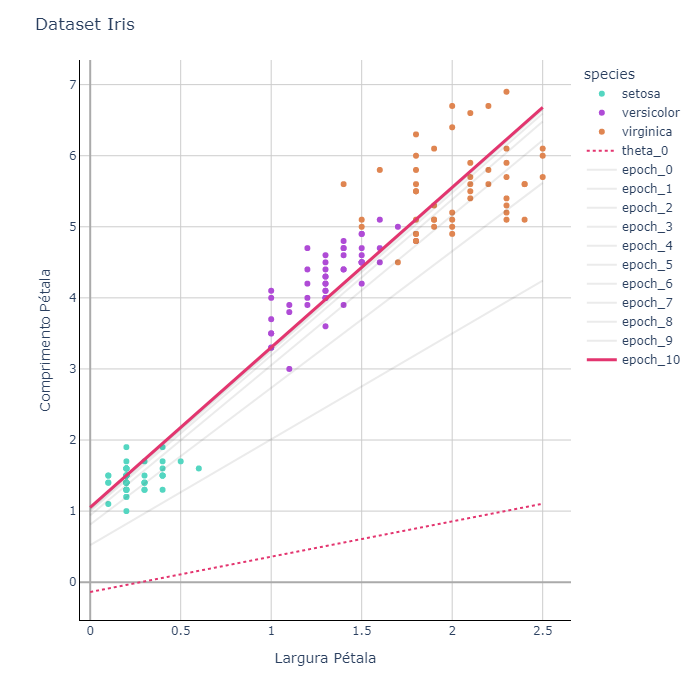

In [75]:
fig = px.scatter(
    iris, x='petal_width', y='petal_length', color='species', 
    color_discrete_sequence=["#54D6C1","#AF4BD6","#DF8551"]
)

plotlymodex.main_layout(
    fig, title='Dataset Iris', height=700,
    x='Largura Pétala', y='Comprimento Pétala'
);

# Hiperparâmetros
eta = 0.1  # learning rate
n_epochs = 11
m = len(X)

# Inicialização aleatória de theta (2x1)
np.random.seed(42)
theta = np.random.randn(2, 1)
a, b = theta
a, b = a.item(), b.item()

x1=0; x2=2.5
fig.add_trace(go.Scatter(
    x=np.array([x1, x2]), y=np.array([a*x1+b, a*x2+b]),
    mode='lines', line=dict(color='#e3356f', dash='dot'),
    name='theta_0'
))

# SGD
for epoch in range(n_epochs):
    # Gradiente calculado com TODOS os exemplos
    gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y.reshape(-1, 1))
    
    # Atualização dos parâmetros
    theta = theta - eta * gradients

    if epoch == n_epochs-1:
        break 

    a, b = theta
    a, b = a.item(), b.item()

    fig.add_trace(go.Scatter(
        x=np.array([x1, x2]), y=np.array([a*x1+b, a*x2+b]),
        mode='lines', line=dict(color='rgba(59, 59, 59, 0.1)'),
        name=f'epoch_{epoch}'
    ))


a, b = theta
a, b = a.item(), b.item()

fig.add_trace(go.Scatter(
    x=np.array([x1, x2]), y=np.array([a*x1+b, a*x2+b]),
    mode='lines', line=dict(color='#e3356f', width=3),
    name=f'epoch_{epoch}'
))